In [245]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

## Reading CSV file

In [246]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


## Analyzing the available data

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [248]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [249]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [250]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [251]:
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [252]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

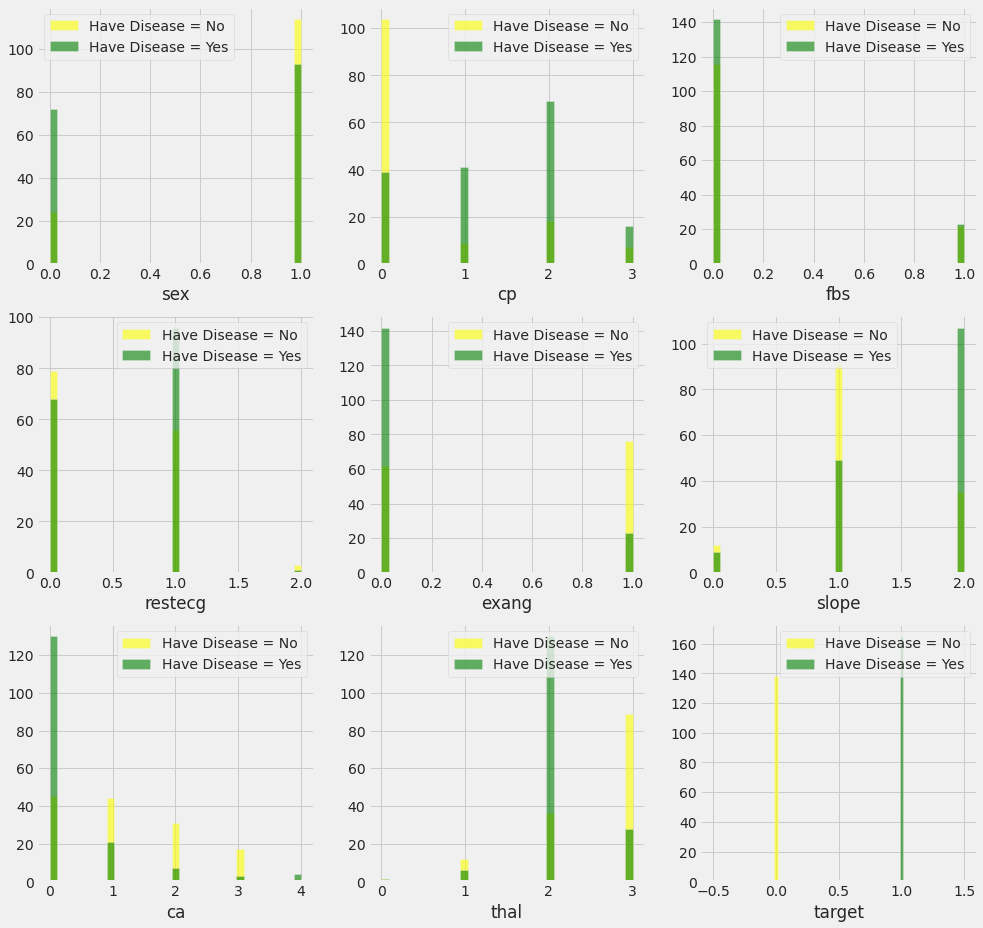

In [253]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='yellow', label='Have Disease = No', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='green', label='Have Disease = Yes', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

## Age vs. Max Heart Rate for Heart Disease

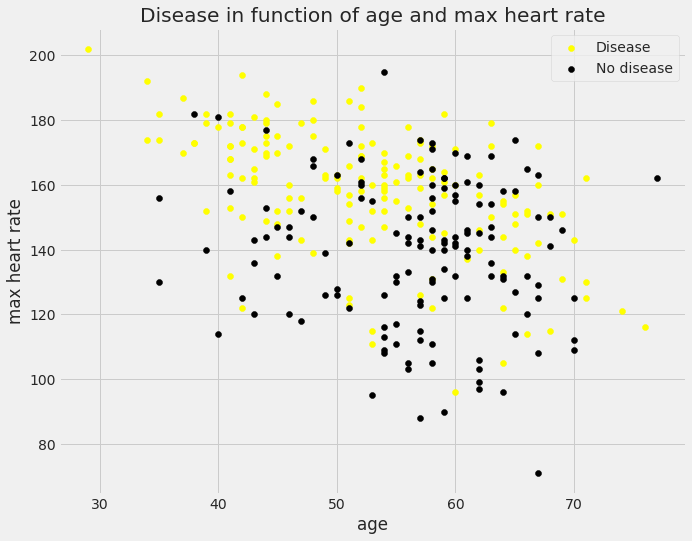

In [254]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="yellow")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="black")

# Add some helpful info
plt.title("Disease in function of age and max heart rate")
plt.xlabel("age")
plt.ylabel("max heart rate")
plt.legend(["Disease", "No disease"]);

# Correlation Matrix

(15.0, -1.0)

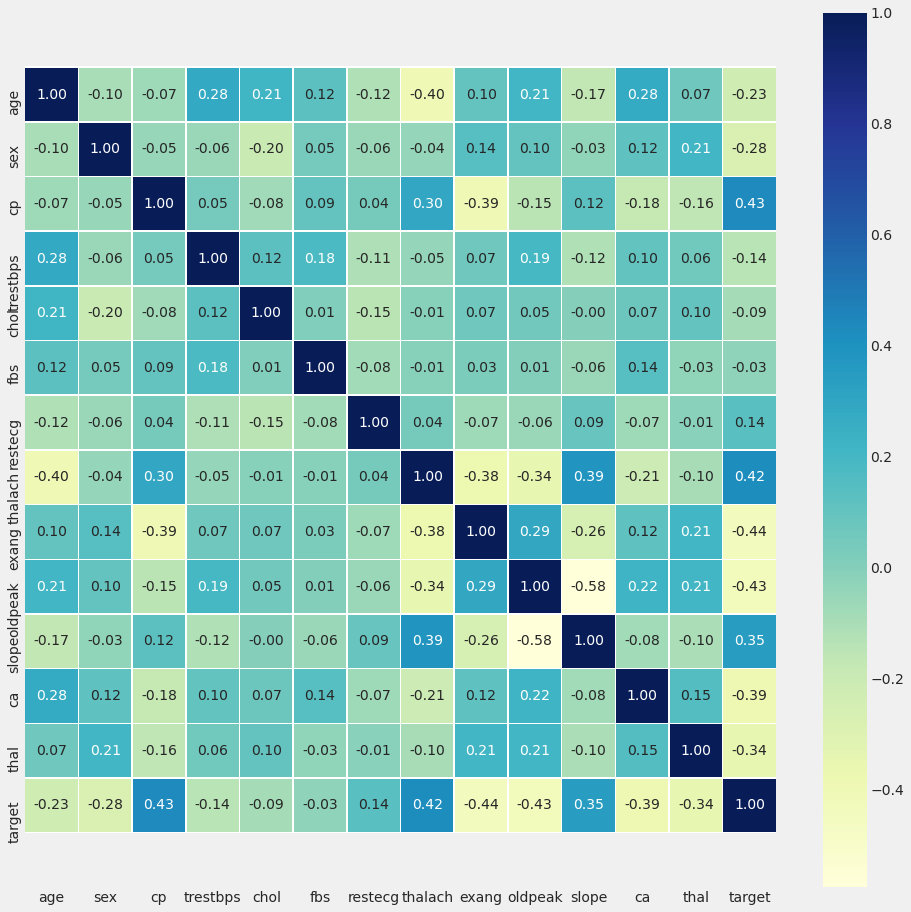

In [255]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1.0, top - 1.0)

<AxesSubplot:title={'center':'Corr with Target'}>

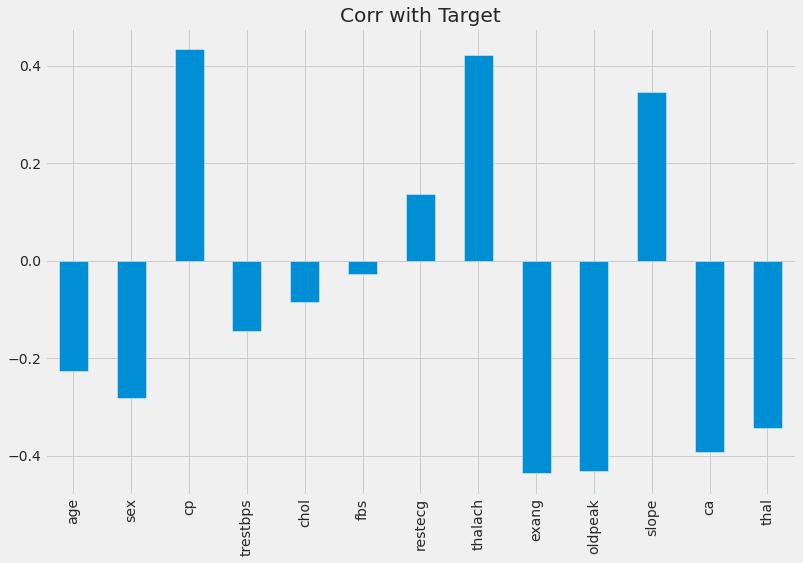

In [256]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Corr with Target")

# Data Processing

In [257]:
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)

In [258]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.30,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.50,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.40,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.80,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.60,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [259]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [260]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.95,0.76,-0.26,0.02,1.09,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.92,-0.09,0.07,1.63,2.12,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.47,-0.09,-0.82,0.98,0.31,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.18,-0.66,-0.20,1.24,-0.21,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.29,-0.66,2.08,0.58,-0.38,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


 # Using machine learning algorithms

In [261]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, xtr, ytr, xts, yts, tr=True):
    if tr:
        pred = clf.predict(xtr)
        print("Train Result:\n_______________________________________________")
        print(f"Accuracy Score: {accuracy_score(ytr, pred) * 100:.2f}%")
        print(f"Recall Score: {recall_score(ytr, pred) * 100:.2f}%")
        print(f"Precision Score: {precision_score(ytr, pred) * 100:.2f}%")
        print(f"F1 score: {f1_score(ytr, pred) * 100:.2f}%")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif tr==False:
        pred = clf.predict(xts)
        print("Test Result:\n_______________________________________________")        
        print(f"Accuracy Score: {accuracy_score(yts, pred) * 100:.2f}%")
        print(f"Recall Score: {recall_score(yts, pred) * 100:.2f}%")
        print(f"Precision Score: {precision_score(yts, pred) * 100:.2f}%")
        print(f"F1 score: {f1_score(yts, pred) * 100:.2f}%")
        print(f"Confusion Matrix: \n {confusion_matrix(yts, pred)}\n")
        

In [262]:
from sklearn.model_selection import train_test_split

x = dataset.drop('target', axis=1)
y = dataset.target

xtr, xts, ytr, yts = train_test_split(x, y, test_size=0.3, random_state=42)


## Linear Regression 

Logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick.
Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1".
Here the dependent variable is target that indicates whether the patient has a disease or not.

In [263]:
from sklearn.linear_model import LogisticRegression

In [264]:
log = LogisticRegression(solver = 'liblinear')
log.fit(xtr, ytr)

LogisticRegression(solver='liblinear')

In [265]:
print_score(log, xtr, ytr, xts, yts, tr=True)
print_score(log, xtr, ytr, xts, yts, tr=False)

Train Result:
_______________________________________________
Accuracy Score: 86.79%
Recall Score: 90.43%
Precision Score: 85.95%
F1 score: 88.14%
Confusion Matrix: 
 [[ 80  17]
 [ 11 104]]

Test Result:
_______________________________________________
Accuracy Score: 86.81%
Recall Score: 90.00%
Precision Score: 86.54%
F1 score: 88.24%
Confusion Matrix: 
 [[34  7]
 [ 5 45]]



In [266]:
test_score = accuracy_score(yts, log.predict(xts)) * 100
train_score = accuracy_score(ytr, log.predict(xtr)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], columns=['Type of model used ', 'Training accuracy %', 'Testing accuracy %'])
results_df

,Type of model used,Training accuracy %,Testing accuracy %
0,Logistic Regression,86.79,86.81


## K-Nearest Neighbours

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition already in the beginning of 1970’s as a non-parametric technique.

In [267]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(xtr,ytr)

print_score(knn_classifier, xtr, ytr, xts, yts, tr=True)
print_score(knn_classifier, xtr, ytr, xts, yts, tr=False)

Train Result:
_______________________________________________
Accuracy Score: 86.79%
Recall Score: 88.70%
Precision Score: 87.18%
F1 score: 87.93%
Confusion Matrix: 
 [[ 82  15]
 [ 13 102]]

Test Result:
_______________________________________________
Accuracy Score: 86.81%
Recall Score: 88.00%
Precision Score: 88.00%
F1 score: 88.00%
Confusion Matrix: 
 [[35  6]
 [ 6 44]]



In [268]:
test_score = accuracy_score(yts, knn_classifier.predict(xts)) * 100
train_score = accuracy_score(ytr, knn_classifier.predict(xtr)) * 100

results_df_2 = pd.DataFrame(data=[["K-Nearest Neighbours", train_score, test_score]], columns=['Type of model used ', 'Training accuracy %', 'Testing accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df



,Type of model used,Training accuracy %,Testing accuracy %
0,Logistic Regression,86.79,86.81
1,K-Nearest Neighbours,86.79,86.81
